<a href="https://colab.research.google.com/github/debabratabepari/Sentiment-Analysis-of-Movie-reviews/blob/main/IMDB_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# loading the dataset
df = pd.read_csv("IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# missing value checking
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
x = df.drop("sentiment", axis=1)
x.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [ ]:
y= df["sentiment"]

In [ ]:
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [ ]:
y.shape

(50000,)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
type(y)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# x_val, x_test, y_val, y_test = train_test_split(x_test_val, y_test_val, test_size= 0.5, random_state=42)
# type(x_val)
# y_val

In [ ]:
# !pip install nltk

In [ ]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# corpus creating by only having a-z elements, lowering, and using lemmatization also used stopwords
def corpus(data):
    c=[]
    for i in range(len(data)):
        temp = re.sub("[^a-zA-Z]"," ",data["review"][i])
        temp = temp.lower()
        temp = temp.split()
        temp = [WordNetLemmatizer().lemmatize(word) for word in temp if not word in stopwords.words("english")]
        temp = " ".join(temp)
        c.append(temp)
    return c;

In [ ]:
# len(corpus(x_train))

In [ ]:
from nltk import sent_tokenize
from nltk import word_tokenize
from gensim.utils import simple_preprocess


In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenization

def token(data):
  words=[]
  for sent in corpus(data):
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
      words.append(simple_preprocess(sent))

  return words;

In [ ]:
# len(token(x_train))

In [ ]:
# Word2vec model

from gensim.models import Word2Vec
def w2v(data):
  return Word2Vec(token(data), vector_size= 300, window=5, min_count=2)

In [ ]:
# reset indexing after splitting

x_train.reset_index(inplace=True)

In [ ]:
x_train.head()

,index,review
0,39087,That's what I kept asking myself during the ma...
1,30893,I did not watch the entire movie. I could not ...
2,45278,A touching love story reminiscent of In the M...
3,16398,This latter-day Fulci schlocker is a totally a...
4,13653,"First of all, I firmly believe that Norwegian ..."


In [ ]:
# training Word2vec model with x_train dataset

w2v_model = w2v(x_train)

In [ ]:
# Vocabulary

w2v_model.wv.index_to_key

['br',
 'movie',
 'film',
 'one',
 'like',
 'time',
 'good',
 'character',
 'story',
 'even',
 'would',
 'get',
 'make',
 'see',
 'really',
 'well',
 'scene',
 'much',
 'bad',
 'people',
 'great',
 'also',
 'first',
 'show',
 'way',
 'thing',
 'made',
 'could',
 'life',
 'think',
 'go',
 'know',
 'watch',
 'love',
 'plot',
 'seen',
 'two',
 'actor',
 'many',
 'year',
 'end',
 'say',
 'never',
 'acting',
 'look',
 'best',
 'little',
 'ever',
 'man',
 'better',
 'take',
 'come',
 'work',
 'still',
 'part',
 'something',
 'find',
 'director',
 'back',
 'give',
 'want',
 'lot',
 'real',
 'watching',
 'guy',
 'performance',
 'woman',
 'though',
 'old',
 'play',
 'funny',
 'another',
 'actually',
 'going',
 'nothing',
 'role',
 'new',
 'every',
 'girl',
 'day',
 'world',
 'point',
 'cast',
 'horror',
 'thought',
 'minute',
 'fact',
 'feel',
 'quite',
 'comedy',
 'pretty',
 'action',
 'around',
 'star',
 'seems',
 'young',
 'got',
 'however',
 'big',
 'long',
 'enough',
 'right',
 'line',
 'f

In [ ]:
# vocabulary size

l = len(w2v_model.wv.index_to_key)
l

50288

In [ ]:
# corpus count
w2v_model.corpus_count

40000

In [ ]:
# Similar words

w2v_model.wv.similar_by_word('trip')

[('road', 0.7785979509353638),
 ('vacation', 0.7339382767677307),
 ('ride', 0.6714776158332825),
 ('spring', 0.663937509059906),
 ('camping', 0.6632187962532043),
 ('holiday', 0.6569988131523132),
 ('remote', 0.6442333459854126),
 ('cabin', 0.6398431658744812),
 ('arrive', 0.6257714629173279),
 ('destination', 0.6228728890419006)]

In [ ]:
w2v_model.wv['trip'].shape

(300,)

In [ ]:
# Average Word2vec function

import numpy as np

def avg_w2v(doc):

  return np.mean([w2v_model.wv[word] for word in doc if word in w2v_model.wv.index_to_key],axis=0)


In [ ]:
from tqdm import tqdm

In [ ]:
# Implementation of average Word2vec

def imp_avg_w2v(data):
  l=[]
  words=token(data)
  # model_wv=w2v(data)
  for i in tqdm(range(len(words))):
    l.append(avg_w2v(words[i]))
  return l

In [ ]:
# Data preparation function: includes all the previous preprocessing steps and returns us prepared data

def data_prep(data):

  data.reset_index(inplace=True)
  prep_data = imp_avg_w2v(data)
  # x_train_new
  prep_data = np.array(prep_data)
  prep_data = prep_data.reshape(len(prep_data),1,300)

  return prep_data;


In [ ]:
# checking nan values

# import math
# sum(math.isnan(x) for x in l if isinstance(x, float))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten, InputLayer
from keras.regularizers import l2

In [ ]:
# Model Building

def build_model(input_shape):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(LSTM(128, recurrent_dropout=0.2, kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
model = build_model((1, 300))  # Adjust input shape based on your vector size
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │         219,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,969 (890.50 KB)

 Trainable params: 227,969 (890.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train_new = data_prep(x_train)
x_train_new

100%|██████████| 40000/40000 [05:47<00:00, 115.15it/s]


array([[[ 0.1852539 ,  0.0604672 , -0.07064303, ...,  0.19262727,
          0.01292579, -0.21246773]],

       [[ 0.18605606,  0.08435641,  0.10736632, ...,  0.3311025 ,
         -0.00729592, -0.3729048 ]],

       [[ 0.5861918 ,  0.17508496, -0.03305424, ...,  0.39839327,
          0.23002006, -0.29958957]],

       ...,

       [[-0.09973919, -0.16756661, -0.02200313, ...,  0.05365353,
         -0.27365616, -0.45074248]],

       [[ 0.09998778,  0.11912252, -0.00162374, ...,  0.10472238,
          0.13887142, -0.49494407]],

       [[ 0.28617367, -0.18415736,  0.00520344, ...,  0.34078267,
         -0.11674249, -0.26631823]]], dtype=float32)

In [ ]:
import tensorflow as tf

# Early Stopping criterion settings

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
# Training the model

model_lstm = model.fit(x_train_new, y_train, epochs= 1000, batch_size=32, validation_split=0.2, callbacks= early_stopping)


Epoch 1/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7971 - loss: 0.5199 - val_accuracy: 0.8589 - val_loss: 0.3593
Epoch 2/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8446 - loss: 0.3835 - val_accuracy: 0.8514 - val_loss: 0.3631
Epoch 3/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8525 - loss: 0.3691 - val_accuracy: 0.8590 - val_loss: 0.3459
Epoch 4/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8500 - loss: 0.3652 - val_accuracy: 0.8602 - val_loss: 0.3452
Epoch 5/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8522 - loss: 0.3564 - val_accuracy: 0.8625 - val_loss: 0.3384
Epoch 6/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8547 - loss: 0.3540 - val_accuracy: 0.8572 - val_loss: 0.3496
Epoch 7/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8505 - loss: 0.3612 - val_accuracy: 0.8650 - val_loss: 0.3360
Epoch 8/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8569

In [ ]:
model_lstm.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
x_test_new = data_prep(x_test)
x_test_new

100%|██████████| 10000/10000 [01:33<00:00, 106.49it/s]


array([[[ 0.00102467, -0.06026659,  0.053477  , ...,  0.01009761,
          0.03741162, -0.25951934]],

       [[ 0.1514381 ,  0.1689404 ,  0.00445862, ...,  0.06814071,
          0.03083657, -0.2925622 ]],

       [[ 0.12821864, -0.01698362, -0.12321559, ...,  0.24279091,
         -0.16904618, -0.45118427]],

       ...,

       [[ 0.21050651,  0.07546856, -0.05874044, ...,  0.14073895,
         -0.08912188, -0.32418674]],

       [[ 0.3316544 , -0.04805043, -0.07938778, ...,  0.28076804,
         -0.18214272, -0.28224155]],

       [[ 0.17771815, -0.07124047, -0.1558065 , ...,  0.18217312,
         -0.52205336, -0.5345968 ]]], dtype=float32)

In [ ]:
# model evaluation
model.evaluate(x_test_new, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - loss: 0.3381


[0.3401641249656677, 0.861299991607666]

In [ ]:
# model prediction in terms of probability

y_prob = model.predict(x_test_new)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.06709533],
       [0.9085361 ],
       [0.0588253 ],
       ...,
       [0.70465416],
       [0.05951207],
       [0.69237113]], dtype=float32)

In [ ]:
# ROC_AUC curve
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Create ROC curve plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC curve (area = %0.2f)' % roc_auc))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Random Guess'))

# Update layout
fig.update_layout(
    title='Receiver Operating Characteristic (ROC)',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    legend=dict(x=0.05, y=0.95),
    margin=dict(l=20, r=20, t=60, b=20),
    hovermode='closest'
)

# Show plot
fig.show()

In [ ]:
y_pred = np.where(y_prob>0.565,1,0)
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

# Performance metrics

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8627
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.87      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



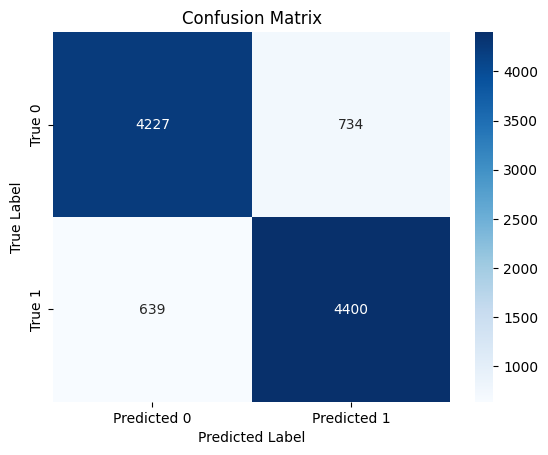

In [ ]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test,y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


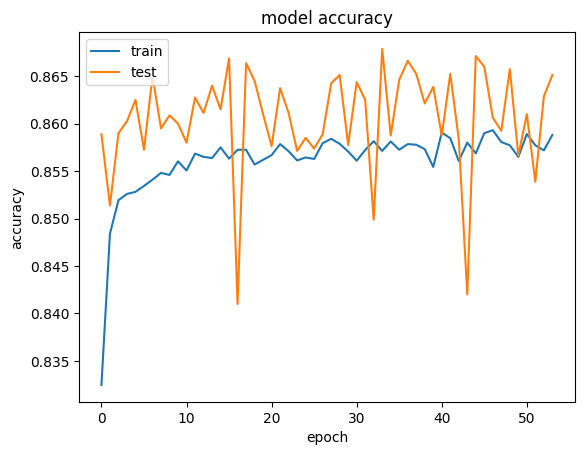

In [ ]:
# summarize history for accuracy

plt.plot(model_lstm.history['accuracy'])
plt.plot(model_lstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

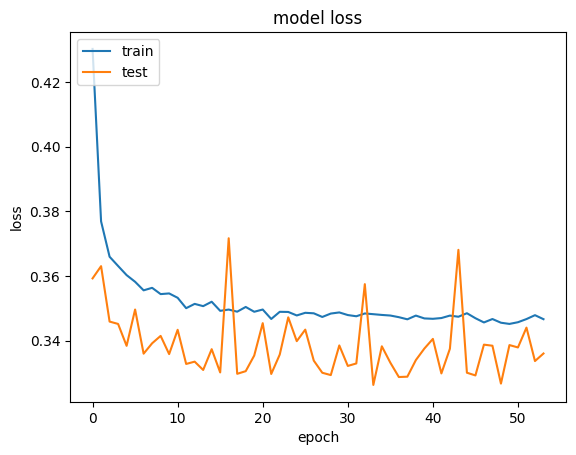

In [ ]:
# Summarize history for loss

plt.plot(model_lstm.history['loss'])
plt.plot(model_lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

In [ ]:
model.save("lstm_w2v_model.h5")

In [ ]:
def load_model_and_predict(input_data):
    from keras.models import load_model
    model = load_model('lstm_w2v_model.h5')

    # Preprocess input_data as done for training
    input_data = pd.DataFrame(input_data, columns=["review"])
    input_data = data_prep(input_data)

    prediction = model.predict(input_data)
    return prediction

In [ ]:
d =["I loved this series so much. Then came season 8 episode 3 and 4. Such a disgraceful ending.Seasons 1-4 10/10 Seasons 5-7 9/10 Season 8 (Ep 1-4) 3/10",
    "I was a big fan of Game of Thrones ever since it first aired on HBO. However, after waiting for two years, I (as probably also a lot of others) felt that the season didn't rise up the rest of the show. I believe the writers and producers didn't do the show justice and rushed the story. In these 6 episodes and pretty much destroyed most of the major character lines. It took 7 seasons for these complex story lines to evolve, just to be shattered in 2 episodes. That being said, taking in consideration that season 8 is a part of GOT, I don't believe anymore that the show deserves the 9.5 stars."]

In [ ]:
prediction = load_model_and_predict(d)
print(prediction)

100%|██████████| 2/2 [00:00<00:00, 352.40it/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
[[0.9855979 ]
 [0.71890515]]
